<img src="vua.png">

# Analiza relevantnosti atributa (WoE + IV)

Analiza relevantnosti atributa temeljni je postupak prilikom provođenja analiza za potrebe kreiranja
prediktivnh modela. Općenito, uzorci mogu imati:
- <b>dva</b> modeliteta ciljne varijable
- <b>više</b> modeliteta ciljne varijable

Kod uzoraka s <b>dva</b> modaliteta ciljne varijable, za procjenu prediktivne snage svakog atributa iz uzorka na ciljnu varijablu se preporučuje izračunavanje mjera <b>Weight of Evidence</b> i <b>Information Value</b>.

## Weight of Evidence (WoE)
Weight of Evidence je mjera kojom prikazujemo povezanost pojedine kategorije unutar jedne varijable s ciljnom varijablom. Računa se formulom:

$$WoE = \ln\frac{Distribucija\space Dobrih}{Distribucija\space Loših}$$

<div class="alert alert-danger">
<b>V A Ž N O  !</b><br>
<br>
WoE možemo koristiti samo na <b>kategoričkim varijablama</b>.<br>Prije računanja WoE za kontinuirane varijable potrebno ih je diskretizirati.
</div>

## Information Value (IV)
Information value je mjera relevantnosti atributa (varijable). Služi za odabir atributa koje ćemo uključiti u izradu prediktivnog modela i njihovo rangiranje po važnosti (prediktivnoj snazi). Računamo je formulom:

$$IV = \sum (Distribucija\space Dobrih - Distribucija\space Loših)*WoE$$

za sve <b>kategoričke</b> vrijednosti svake varijable.

Izračunate vrijednosti za sve varijable sortiramo silazno prema *IV* te na kraju u prediktivni model uključujemo samo najbolje.<br>
<br>
U sljedećoj tablici možete vidjeti usporedbu *IV* vrijednosti s prediktivnošću
varijable.

IV|Prediktivnost varijable
------------|----------------
< 0.02|Varijabla nije korisna
0.02-0.1|Slaba prediktivnost
0.1-0.3|Srednja prediktivnost
0.3-0.5|Jaka prediktivnost
> 0.5|Super prediktivnost

## Primjer izračunavanja WoE i IV

U sljedećem primjeru je izračunavanje mjere relevantnosti atributa IV podijeljeno u 6 koraka:
- Učitavanje podataka iz CSV (Comma Separated Values) datoteke
- Definicija ciljne varijable
- Pretvaranje odabrane kontinuirane varijable u kategoričku
- Računanje WoE i IV za svaku kategoriju odabrane varijable
- Računanje IV za cijelu varijablu
- Grafički prikaz i interpretacija rezultata

Koristit ćemo set podataka koji sadrži 150 redaka u kojem svaki redak predstavlja podatke o jednom cvijetu. Svaki cvijet pripada jednoj od tri kategorije:

<img src="iris3.png">

Za svaki cvijet imamo na raspolaganju četiri varijable (features):
- sepal length
- sepal width
- petal length
- petal width

Cilj vježbe je odgovoriti na sljedeće pitanje:
- Na temelju koje od četiri varijable možemo najlakše prepoznati cvijet **Iris-setosa**?

Drugim riječima: tražimo varijablu koja je najrelevantnija za prepoznavanje cvijeta **Iris-setosa**.


### Učitavanje podataka iz CSV (Comma Separated Values) datoteke

Učitajmo podatke iz datoteke "iris.csv" i pogledajmo prva tri retka za svaku od vrsta cvjetova.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as plt

path='iris.csv'
# ako želite analizirati neku drugu datoteku, promijenite naziv datoteke (unutar navodnika) u gornjem retku

df = pd.read_csv(path, sep=';')
df.groupby('iris').head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


### Definicija ciljne varijable
Budući da želimo prepoznati vrstu **Iris-setosa** kreirat ćemo ciljnu varijablu koja ima vrijednost "DA" u svakom retku koji se odnosi na **Iris-setosa** i vrijednost "NE" u svim ostalim retcima.

In [2]:
df['ciljna'] = 'NE'
df.loc[df.iris=='Iris-setosa', 'ciljna'] = "DA"
# Ako želite neku drugu ciljnu varijablu, zamijenite naziv 'Iris-setosa' u retku iznad 
df.groupby('iris').head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris,ciljna
0,5.1,3.5,1.4,0.2,Iris-setosa,DA
1,4.9,3.0,1.4,0.2,Iris-setosa,DA
2,4.7,3.2,1.3,0.2,Iris-setosa,DA
50,7.0,3.2,4.7,1.4,Iris-versicolor,NE
51,6.4,3.2,4.5,1.5,Iris-versicolor,NE
52,6.9,3.1,4.9,1.5,Iris-versicolor,NE
100,6.3,3.3,6.0,2.5,Iris-virginica,NE
101,5.8,2.7,5.1,1.9,Iris-virginica,NE
102,7.1,3.0,5.9,2.1,Iris-virginica,NE


### Pretvaranje odabrane kontinuirane varijable u kategoričku
Izračunat ćemo naprije relevantnost varijable **sepalwidth**. Budući da je varijabla kontinuirana (može poprimiti bilo koju vrijednost u rasponu između minimalne i maksimalne širine lista) podijelit ćemo je, za primjer, na 3 kategorije.

In [3]:
df['kategorija'] = pd.qcut(df.sepalwidth,8)
df.groupby('iris').head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris,ciljna,kategorija
0,5.1,3.5,1.4,0.2,Iris-setosa,DA,"(3.3, 3.5]"
1,4.9,3.0,1.4,0.2,Iris-setosa,DA,"(2.9, 3.0]"
2,4.7,3.2,1.3,0.2,Iris-setosa,DA,"(3.1, 3.3]"
50,7.0,3.2,4.7,1.4,Iris-versicolor,NE,"(3.1, 3.3]"
51,6.4,3.2,4.5,1.5,Iris-versicolor,NE,"(3.1, 3.3]"
52,6.9,3.1,4.9,1.5,Iris-versicolor,NE,"(3.0, 3.1]"
100,6.3,3.3,6.0,2.5,Iris-virginica,NE,"(3.1, 3.3]"
101,5.8,2.7,5.1,1.9,Iris-virginica,NE,"(2.562, 2.8]"
102,7.1,3.0,5.9,2.1,Iris-virginica,NE,"(2.9, 3.0]"


### Računanje WoE i IV za svaku kategoriju odabrane varijable

Prvo definiramo dvije nove varijable *a* i *b* koje će čuvati serije podataka s vrjednostima varijable *katedorija* i *ciljna*. Mogli smo koristiti i pune nazive ali ovako će nam biti jednostavnije.

In [4]:
a = df.kategorija
b = df.ciljna
print(a.head())
print(b.head())

0    (3.3, 3.5]
1    (2.9, 3.0]
2    (3.1, 3.3]
3    (3.0, 3.1]
4    (3.5, 4.4]
Name: kategorija, dtype: category
Categories (8, interval[float64, right]): [(1.999, 2.562] < (2.562, 2.8] < (2.8, 2.9] < (2.9, 3.0] < (3.0, 3.1] < (3.1, 3.3] < (3.3, 3.5] < (3.5, 4.4]]
0    DA
1    DA
2    DA
3    DA
4    DA
Name: ciljna, dtype: object


Zatim korištenjem metode *crosstab* radimo pivot tablicu od ove dvioje varijable.

In [5]:
IV=pd.crosstab(a,b)
IV

ciljna,DA,NE
kategorija,,
"(1.999, 2.562]",1,18
"(2.562, 2.8]",0,28
"(2.8, 2.9]",1,9
"(2.9, 3.0]",6,20
"(3.0, 3.1]",5,7
"(3.1, 3.3]",7,12
"(3.3, 3.5]",15,3
"(3.5, 4.4]",15,3


Sada kad smo dobili broj pojavljivanja po kategorijama trebaju nam omjeri, odnosno za pojedinu kategoriju broj vrijednosti koje su bile primjerice u stupcu *DA* podjelimo s ukupnim brojem svih vrijednosti u tom stupcu.

In [6]:
IV['DA']=IV['DA']/IV['DA'].sum()
IV['NE']=IV['NE']/IV['NE'].sum()
IV

ciljna,DA,NE
kategorija,,
"(1.999, 2.562]",0.02,0.18
"(2.562, 2.8]",0.00,0.28
"(2.8, 2.9]",0.02,0.09
"(2.9, 3.0]",0.12,0.20
"(3.0, 3.1]",0.10,0.07
"(3.1, 3.3]",0.14,0.12
"(3.3, 3.5]",0.30,0.03
"(3.5, 4.4]",0.30,0.03


Isti rezultat smo mogli dobiti i korištenjem *lambda* funkcije i na rezultat metode *crosstab* odmah primjeniti formulu.

In [7]:
IV=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
IV

ciljna,DA,NE
kategorija,,
"(1.999, 2.562]",0.02,0.18
"(2.562, 2.8]",0.00,0.28
"(2.8, 2.9]",0.02,0.09
"(2.9, 3.0]",0.12,0.20
"(3.0, 3.1]",0.10,0.07
"(3.1, 3.3]",0.14,0.12
"(3.3, 3.5]",0.30,0.03
"(3.5, 4.4]",0.30,0.03


Sada kada imamo omjere po vrijednostima koristimo gornju formulu za izračun WoE (Weight of Evidence) za pojedinu kategoriju.

In [8]:
IV['WoE'] = np.log(IV['DA']/IV['NE'])
IV

/home/mislav/projects/nosql/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ciljna,DA,NE,WoE
kategorija,,,
"(1.999, 2.562]",0.02,0.18,-2.197225
"(2.562, 2.8]",0.00,0.28,-inf
"(2.8, 2.9]",0.02,0.09,-1.504077
"(2.9, 3.0]",0.12,0.20,-0.510826
"(3.0, 3.1]",0.10,0.07,0.356675
"(3.1, 3.3]",0.14,0.12,0.154151
"(3.3, 3.5]",0.30,0.03,2.302585
"(3.5, 4.4]",0.30,0.03,2.302585


Te jednako tako računamo IV (Information Value) po kategorijama. Ta vrijednost po kategorijama nam ne znači ništa već je trebamo sumirati da bi dobili važnost varijable.

In [9]:
IV['IV'] = (IV['DA']-IV['NE'])* np.log(IV['DA']/IV['NE'])
IV


/home/mislav/projects/nosql/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ciljna,DA,NE,WoE,IV
kategorija,,,,
"(1.999, 2.562]",0.02,0.18,-2.197225,0.351556
"(2.562, 2.8]",0.00,0.28,-inf,inf
"(2.8, 2.9]",0.02,0.09,-1.504077,0.105285
"(2.9, 3.0]",0.12,0.20,-0.510826,0.040866
"(3.0, 3.1]",0.10,0.07,0.356675,0.010700
"(3.1, 3.3]",0.14,0.12,0.154151,0.003083
"(3.3, 3.5]",0.30,0.03,2.302585,0.621698
"(3.5, 4.4]",0.30,0.03,2.302585,0.621698


Možemo i pospremiti prethodnu tablicu u datoteku.

In [10]:
IV.to_csv('Test.csv')
IV

ciljna,DA,NE,WoE,IV
kategorija,,,,
"(1.999, 2.562]",0.02,0.18,-2.197225,0.351556
"(2.562, 2.8]",0.00,0.28,-inf,inf
"(2.8, 2.9]",0.02,0.09,-1.504077,0.105285
"(2.9, 3.0]",0.12,0.20,-0.510826,0.040866
"(3.0, 3.1]",0.10,0.07,0.356675,0.010700
"(3.1, 3.3]",0.14,0.12,0.154151,0.003083
"(3.3, 3.5]",0.30,0.03,2.302585,0.621698
"(3.5, 4.4]",0.30,0.03,2.302585,0.621698


### Računanje IV za cijelu varijablu
Izračunajmo ukupnu vrijednost IV za promatranu varijablu zbrajanjem vrijednosti IV za sve kategorije

In [11]:
IV['IV'].sum()

np.float64(inf)

### Grafički prikaz i interpretacija rezultata
Vrijednosti WoE manje od nule pokazuju vjerojatniju pripadnost kategoriji "NE" ciljne varijable, a vrijednosti veće od nule pokazuju vjerojatniju pripadnost kategoriji "DA". Uočite da pripadnost ili nepripadnost pojedinoj kategoriji ciljne varijable ovisi o kategoriji ciljne varijable (DA ili NE) koju smo stavili u brojnik odnosno nazivnik formule za izračunavanje WoE.

/home/mislav/projects/nosql/.venv/lib/python3.12/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/home/mislav/projects/nosql/.venv/lib/python3.12/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


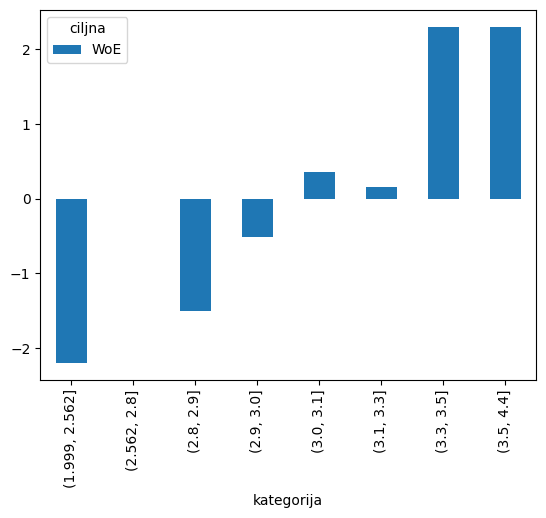

In [12]:
%matplotlib inline

import matplotlib.pyplot as p
IV[['WoE']].plot(kind='bar')
p.show()

Na primjeru varijable **sepalwidth** možemo zaključiti da listovi širine od 2-2,9 ne spadaju u kategoriju Iris-setosa, listovi širine 2,9-3,2 imaju neodređenu pripadnost, dok očekivanu pripadnost ovom tipu irisa imaju listovi širine 3,2-4,4.

<br>
<div class="alert alert-info">
<b>Zadatak 1</b>
</div>

### Upute
1. Napravite funkciju koja vam za poslani DataFrame, vraća Information Value.
2. U pozivu funkcije osim DataFramea morate omogućiti upis imena stupaca za ulazne varijable (features) i ciljnu varijablu (target). Ako imena stupaca nisu navedena u pozivu funkcije onda treba izračunati IV za sve varijable u DataFrameu.
3. Funkcija mora vratiti DataFrame s popisom ulaznih varijabli, silazno sortiranih po vrijednosti IV.
4. Povežite te vrijednosti s tablicom prediktivnosti i dodajte stupac s tekstualnim opisom prediktivnosti varijable.

> Napomena: Izračunajte IV <b>samo za kategoričke varijable</b> (vrstu varijable možete otkriti metodom *dtype*).

Naziv stupca | Opis
------|------
dob|Starost korisnika
nkid|Broj djece
dep|Broj drugih uzdržavanih osoba
phon|Ima kućni telefon 1=da, 0=ne
sinc|Dohodak supružnika
aes|Radni status (V = državni službenik, W = domaćica, M = vojnik, P = privatni sektor, B = javni sektor, R = umirovljenik, E = samozaposlen, T = student, U = nezaposlen, N = ostalo, Z  = bez odgovora)
dainc|Prihodi
res|Stambeni status (O = vlasnik, F = podstanar, P = sa roditeljima, N = drugo, Z = bez odgovora)
dhval|Vrijednost nekretnine (Ako je 0 nema nekretninu)
dmort|Vrijednost hipoteke (Ako je 0 nema nekretninu)
doutm|Rashodi na hipoteku ili iznajmljivanje
doutl|Rashodi na kredite
douthp|Rashodi na otplatu
doutcc|Rashodi na kreditnim karticama
Bad|**Ciljna varijabla**: indikator dobar/loš (1 = Loš, 0 = Dobar)

In [20]:
# U nastavku upišite kôd funkcije
# Komentirajte pojedine korake uz kôd ili korištenjem "Markdown" ćelija)

import pandas as pd
import numpy as np

def calculate_iv(df, features=None, target='BAD'):
    """
    Funkcija izračunava Information Value (IV) za kategoričke varijable.
    
    Parametri:
    -----------
    df : pandas.DataFrame
        DataFrame s podacima
    features : list, optional
        Lista imena stupaca (varijabli) za koje trebamo izračunati IV
        Ako nije navedena, izračunava se IV za sve kategoričke varijable
    target : str, default='Bad'
        Naziv stupca s ciljnom varijablom
    
    Povratna vrijednost:
    -----------
    pandas.DataFrame
        DataFrame s popisom varijabli sortirane po IV (silazno)
        Stupci: Nezavisna varijabla, IV, Prediktivnost
    """
    
    # Ako features nisu specificirani, koristimo sve kategoričke varijable osim target-a
    if features is None:
        # Filtriramo samo kategoričke varijable (object dtype)
        features = [col for col in df.columns if col != target and df[col].dtype == 'object']
    else:
        # Filtriramo samo kategoričke varijable iz liste features
        features = [col for col in features if df[col].dtype == 'object' and col != target]
    
    # Definiramo tablicu za mapiranje IV vrijednosti na tekstualni opis prediktivnosti
    iv_categories = {
        'interval_1': (0, 0.02, 'Varijabla nije korisna'),
        'interval_2': (0.02, 0.1, 'Slaba prediktivnost'),
        'interval_3': (0.1, 0.3, 'Srednja prediktivnost'),
        'interval_4': (0.3, 0.5, 'Jaka prediktivnost'),
        'interval_5': (0.5, float('inf'), 'Super prediktivnost')
    }
    
    results = []
    
    # Za svaku varijablu izračunamo IV
    for feature in features:
        # Kreiramo pivot tablicu sa brojevima
        crosstab = pd.crosstab(df[feature], df[target])
        
        # Normaliziramo po kolonama (omjeri)
        crosstab_normalized = crosstab.apply(lambda col: col / col.sum(), axis=0)
        
        # Izračunavamo WoE (Weight of Evidence)
        # WoE = ln(Distribucija Dobrih / Distribucija Loših)
        # Pretpostavljamo da je 0 = dobar, 1 = loš
        try:
            # Provjera da li su stupci dostupni
            if 0 in crosstab_normalized.columns and 1 in crosstab_normalized.columns:
                woe = np.log(crosstab_normalized[0] / crosstab_normalized[1])
                # Izračunavamo IV (Information Value)
                # IV = sum((Distribucija Dobrih - Distribucija Loših) * WoE)
                iv = ((crosstab_normalized[0] - crosstab_normalized[1]) * woe).sum()
            else:
                # Ako nema stupaca 0 i 1, preskačemo
                continue
        except (ZeroDivisionError, ValueError):
            # Ako ima dijeljenja sa nulom ili drugih grešaka, IV = 0
            iv = 0
        
        # Određujemo prediktivnost na temelju IV vrijednosti
        predictivity = 'Nepoznato'
        for _, (lower, upper, pred) in iv_categories.items():
            if lower <= iv < upper:
                predictivity = pred
                break
        
        results.append({
            'Nezavisna varijabla': feature.upper(),
            'IV': round(iv, 4),
            'Prediktivnost': predictivity
        })
    
    # Kreiramo DataFrame s rezultatima
    result_df = pd.DataFrame(results)
    
    # Sortiramo silazno po IV vrijednostima
    result_df = result_df.sort_values('IV', ascending=False).reset_index(drop=True)
    
    return result_df


In [22]:
# Ovdje napišite kôd koji poziva funkciju,
# ispisuje rezultat za kategoričke varijable sortirane po IV

df = pd.read_csv('CS.csv', sep=';')

# Pozivanje funkcije
iv_results = calculate_iv(df, target='BAD')

# Ispis rezultata
print("Information Value (IV) za kategoričke varijable:\n")
print(iv_results.to_string(index=False))

# Prikazivanje kao DataFrame
iv_results


Information Value (IV) za kategoričke varijable:

Nezavisna varijabla     IV         Prediktivnost
                AES 0.1764 Srednja prediktivnost
                RES 0.0589   Slaba prediktivnost


,Nezavisna varijabla,IV,Prediktivnost
0,AES,0.1764,Srednja prediktivnost
1,RES,0.0589,Slaba prediktivnost


Rezultat bi trebao izgledati ovako:

Nezavisna varijabla|IV|Prediktivnost
------|-----|---
AES|0.1764|Srednja prediktivnost
RES|0.0589|Srednja prediktivnost
NKID|0.0188|Slaba prediktivnost
PHON|0.0091|Varijabla nije korisna
DEP|0.0039|Varijabla nije korisna

Snimite DataFrame s izračunatim relevantnostima atributa u datoteku pod nazivom "WoE_IV.csv"

In [18]:
# Ovdje napišite kod za snimanje datoteke

# Snimanje rezultata u CSV datoteku
iv_results.to_csv('WoE_IV.csv', index=False, sep=';')
print("Datoteka 'WoE_IV.csv' je uspješno snimljena!")


Datoteka 'WoE_IV.csv' je uspješno snimljena!


U nastavku grafički prikažite WoE **za sve varijable** (prema predlošku u stupcu NKID u sljedećem primjeru):

Nezavisna varijabla|IV|Prediktivnost
------|-----|---|---
AES|0.1764|Srednja prediktivnost|
RES|0.0589|Srednja prediktivnost|
NKID|0.0188|Slaba prediktivnost|<img src="sample.png",width=200, height=100>
PHON|0.0091|Varijabla nije korisna|
DEP|0.0039|Varijabla nije korisna|

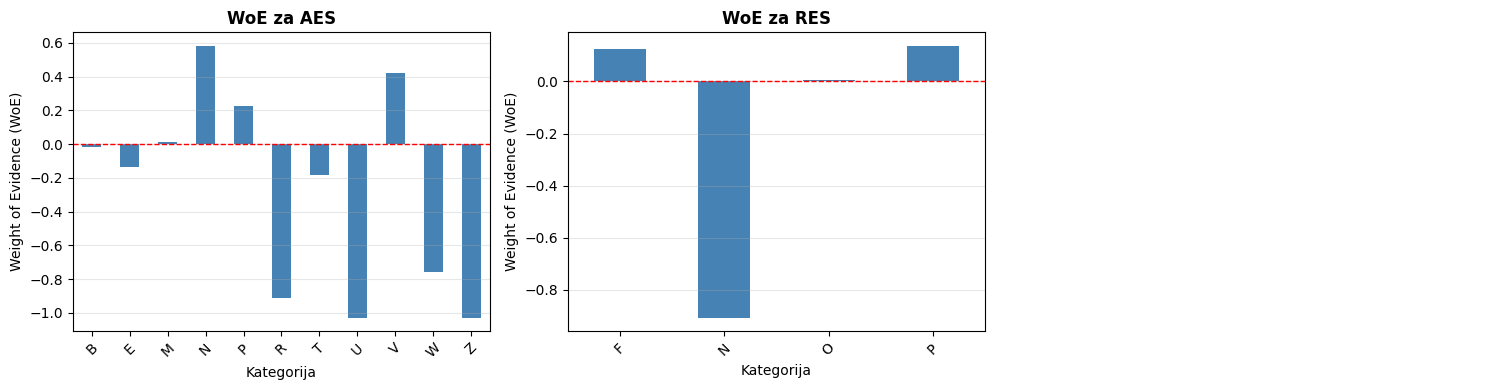

In [19]:
# ovdje napišite kod koji grafički prikazuje WoE za sve varijable

%matplotlib inline
import matplotlib.pyplot as plt

# Pronalazimo sve kategoričke varijable (osim target-a)
categorical_features = [col for col in df.columns if col != 'BAD' and df[col].dtype == 'object']

# Kreiramo subplotove za svaku varijablu
n_vars = len(categorical_features)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()  # Pretvaramo u 1D array za lakši pristup

# Za svaku varijablu kreiramo grafikon
for idx, feature in enumerate(categorical_features):
    # Kreiramo pivot tablicu
    crosstab = pd.crosstab(df[feature], df['BAD'])
    
    # Normaliziramo po kolonama
    crosstab_normalized = crosstab.apply(lambda col: col / col.sum(), axis=0)
    
    try:
        # Izračunavamo WoE
        if 0 in crosstab_normalized.columns and 1 in crosstab_normalized.columns:
            woe = np.log(crosstab_normalized[0] / crosstab_normalized[1])
            
            # Crtamo grafikon
            woe.plot(kind='bar', ax=axes[idx], color='steelblue')
            axes[idx].set_title(f'WoE za {feature.upper()}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Kategorija')
            axes[idx].set_ylabel('Weight of Evidence (WoE)')
            axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=1)
            axes[idx].grid(axis='y', alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45)
    except:
        pass

# Skrivamo prazne subplotove
for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


<br>
<div class="alert alert-info">
<b>Kraj prvog zadatka</b>
</div>

<br>
<div class="alert alert-info">
<b>Zadatak 2</b>
</div>

### Upute
1. Proširite prethodni zadatak tako da za kontinuirane varijable napravite diskretizaciju te vratite rezultatate i za njih.

In [23]:
# Prošireni zadatak 2: IV i za kontinuirane varijable (uz diskretizaciju)

def calculate_iv_with_discretization(df, features=None, target='BAD', bins=5):
    """
    Računa IV za sve kategoričke i kontinuirane varijable (kontinuirane se diskretiziraju na zadani broj binova).
    """
    import pandas as pd
    import numpy as np
    
    # Ako features nisu specificirani, koristi sve varijable osim targeta
    if features is None:
        features = [col for col in df.columns if col != target]
    else:
        features = [col for col in features if col != target]
    
    # Pripremi listu za rezultate
    results = []
    
    # Kriteriji za tekstualni opis IV
    iv_categories = {
        'interval_1': (0, 0.02, 'Varijabla nije korisna'),
        'interval_2': (0.02, 0.1, 'Slaba prediktivnost'),
        'interval_3': (0.1, 0.3, 'Srednja prediktivnost'),
        'interval_4': (0.3, 0.5, 'Jaka prediktivnost'),
        'interval_5': (0.5, float('inf'), 'Super prediktivnost')
    }
    
    for feature in features:
        # Ako je numerička varijabla, diskretiziraj je
        if np.issubdtype(df[feature].dtype, np.number):
            # Diskretizacija na 'bins' kategorija
            try:
                temp = pd.qcut(df[feature], bins, duplicates='drop')
            except Exception:
                continue  # preskoči ako ne može diskretizirati
            crosstab = pd.crosstab(temp, df[target])
        else:
            crosstab = pd.crosstab(df[feature], df[target])
        # Normalizacija po kolonama
        crosstab_normalized = crosstab.apply(lambda col: col / col.sum(), axis=0)
        try:
            if 0 in crosstab_normalized.columns and 1 in crosstab_normalized.columns:
                woe = np.log(crosstab_normalized[0] / crosstab_normalized[1])
                iv = ((crosstab_normalized[0] - crosstab_normalized[1]) * woe).sum()
            else:
                continue
        except (ZeroDivisionError, ValueError):
            iv = 0
        predictivity = 'Nepoznato'
        for _, (lower, upper, pred) in iv_categories.items():
            if lower <= iv < upper:
                predictivity = pred
                break
        results.append({
            'Nezavisna varijabla': feature.upper(),
            'IV': round(iv, 4),
            'Prediktivnost': predictivity
        })
    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values('IV', ascending=False).reset_index(drop=True)
    return result_df

# Pozovi funkciju i ispiši rezultate
iv_all = calculate_iv_with_discretization(df, target='BAD', bins=5)
print("IV za sve varijable (uključujući diskretizirane kontinuirane):\n")
print(iv_all.to_string(index=False))
iv_all

IV za sve varijable (uključujući diskretizirane kontinuirane):

Nezavisna varijabla     IV          Prediktivnost
              DAINC 0.2212  Srednja prediktivnost
                AES 0.1764  Srednja prediktivnost
                DOB 0.0677    Slaba prediktivnost
                RES 0.0589    Slaba prediktivnost
              DOUTM 0.0408    Slaba prediktivnost
              DMORT 0.0394    Slaba prediktivnost
              DHVAL 0.0381    Slaba prediktivnost
              DOUTL 0.0171 Varijabla nije korisna
               SINC 0.0066 Varijabla nije korisna
               NKID 0.0030 Varijabla nije korisna
                DEP 0.0000 Varijabla nije korisna
               PHON 0.0000 Varijabla nije korisna
             DOUTHP 0.0000 Varijabla nije korisna
             DOUTCC 0.0000 Varijabla nije korisna


,Nezavisna varijabla,IV,Prediktivnost
0,DAINC,0.2212,Srednja prediktivnost
1,AES,0.1764,Srednja prediktivnost
2,DOB,0.0677,Slaba prediktivnost
3,RES,0.0589,Slaba prediktivnost
4,DOUTM,0.0408,Slaba prediktivnost
5,DMORT,0.0394,Slaba prediktivnost
6,DHVAL,0.0381,Slaba prediktivnost
7,DOUTL,0.0171,Varijabla nije korisna
8,SINC,0.0066,Varijabla nije korisna
9,NKID,0.0030,Varijabla nije korisna


<br>
<div class="alert alert-info">
<b>Kraj drugog zadatka</b>
</div>